In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc, precision_recall_curve
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier


In [2]:
df = pd.read_csv(r"C:\Users\oscar\Downloads\bankdata.csv", sep=';', quotechar='"')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41189 entries, 0 to 41188
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41189 non-null  int64  
 1   job             41189 non-null  object 
 2   marital         41189 non-null  object 
 3   education       41189 non-null  object 
 4   default         41189 non-null  object 
 5   housing         41189 non-null  object 
 6   loan            41189 non-null  object 
 7   contact         41189 non-null  object 
 8   month           41189 non-null  object 
 9   day_of_week     41189 non-null  object 
 10  duration        41189 non-null  int64  
 11  campaign        41189 non-null  int64  
 12  pdays           41189 non-null  int64  
 13  previous        41189 non-null  int64  
 14  poutcome        41189 non-null  object 
 15  emp.var.rate    41189 non-null  float64
 16  cons.price.idx  41189 non-null  float64
 17  cons.conf.idx   41189 non-null 

In [9]:
df.head(20)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
5,45,services,married,basic.9y,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
6,59,admin.,married,professional.course,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
7,41,blue-collar,married,unknown,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
8,24,technician,single,professional.course,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
9,25,services,single,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [3]:
# replace unknown value with na
df.replace('unknown', pd.NA, inplace=True)

In [4]:
# drop duplicate
df = df.drop_duplicates()

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 41176 entries, 0 to 41188
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41176 non-null  int64  
 1   job             40846 non-null  object 
 2   marital         41096 non-null  object 
 3   education       39446 non-null  object 
 4   default         32580 non-null  object 
 5   housing         40186 non-null  object 
 6   loan            40186 non-null  object 
 7   contact         41176 non-null  object 
 8   month           41176 non-null  object 
 9   day_of_week     41176 non-null  object 
 10  duration        41176 non-null  int64  
 11  campaign        41176 non-null  int64  
 12  pdays           41176 non-null  int64  
 13  previous        41176 non-null  int64  
 14  poutcome        41176 non-null  object 
 15  emp.var.rate    41176 non-null  float64
 16  cons.price.idx  41176 non-null  float64
 17  cons.conf.idx   41176 non-null  floa

In [24]:
demographic_cols = ['age', 'job', 'marital', 'education', 'default', 'housing', 'loan']
print("=== Demographic Summary ===")
df[demographic_cols].describe(include='all')

=== Demographic Summary ===


,age,job,marital,education,default,housing,loan
count,41176.00000,40846,41096,39446,32580,40186,40186
unique,NaN,11,3,7,2,2,2
top,NaN,admin.,married,university.degree,no,yes,no
freq,NaN,10419,24921,12164,32577,21571,33938
mean,40.02380,NaN,NaN,NaN,NaN,NaN,NaN
std,10.42068,NaN,NaN,NaN,NaN,NaN,NaN
min,17.00000,NaN,NaN,NaN,NaN,NaN,NaN
25%,32.00000,NaN,NaN,NaN,NaN,NaN,NaN
50%,38.00000,NaN,NaN,NaN,NaN,NaN,NaN
75%,47.00000,NaN,NaN,NaN,NaN,NaN,NaN


In [25]:
print(df[demographic_cols].isna().sum())

age             0
job           330
marital        80
education    1730
default      8596
housing       990
loan          990
dtype: int64


In [23]:
last_contact_cols = ['contact', 'month', 'day_of_week', 'duration']
print("\n=== Last Contact Summary ===")
df[last_contact_cols].describe(include='all')


=== Last Contact Summary ===


,contact,month,day_of_week,duration
count,41176,41176,41176,41176.000000
unique,2,10,5,NaN
top,cellular,may,thu,NaN
freq,26135,13767,8618,NaN
mean,NaN,NaN,NaN,258.315815
std,NaN,NaN,NaN,259.305321
min,NaN,NaN,NaN,0.000000
25%,NaN,NaN,NaN,102.000000
50%,NaN,NaN,NaN,180.000000
75%,NaN,NaN,NaN,319.000000


In [26]:
print(df[last_contact_cols].isna().sum())

contact        0
month          0
day_of_week    0
duration       0
dtype: int64


In [18]:
print(df['y'].value_counts(normalize=True))

y
no     0.887337
yes    0.112663
Name: proportion, dtype: float64


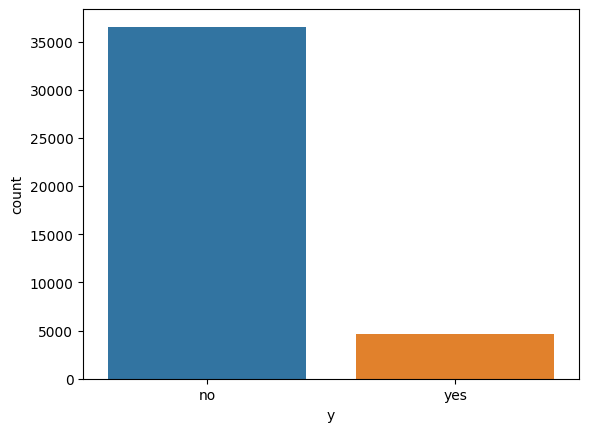

In [19]:
sns.countplot(x='y', data=df)
plt.show()

C:\Users\oscar\AppData\Local\Temp\ipykernel_18740\727825495.py:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x='duration', y='y', data=df, ci=None)


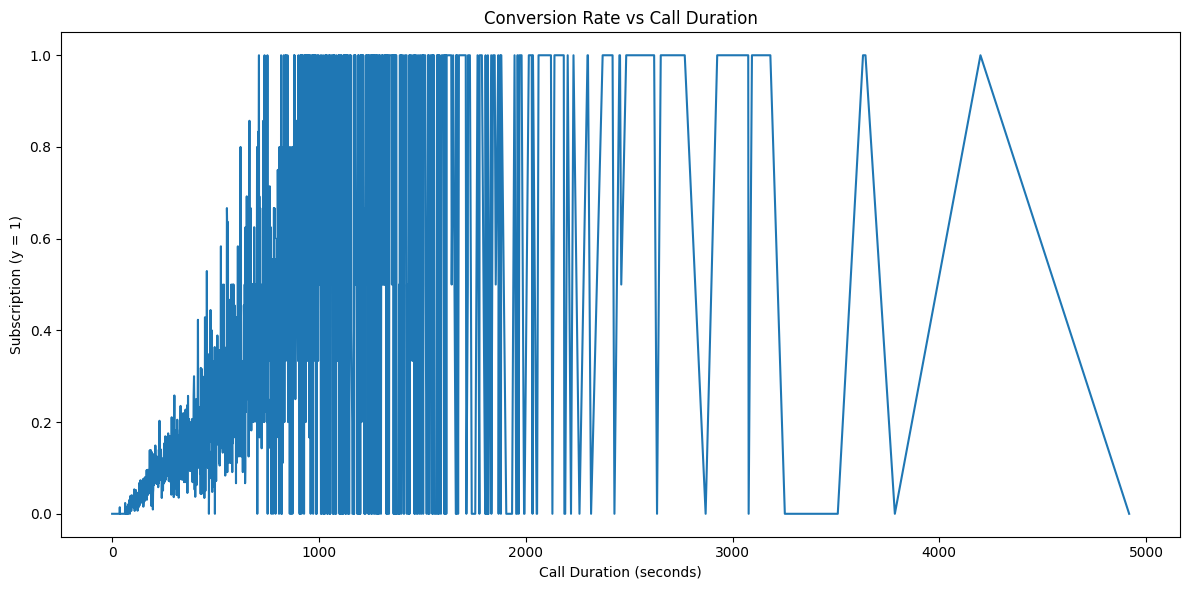

In [24]:
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.lineplot(x='duration', y='y', data=df, ci=None)
plt.title('Conversion Rate vs Call Duration')
plt.xlabel('Call Duration (seconds)')
plt.ylabel('Subscription (y = 1)')
plt.tight_layout()
plt.show()

In [27]:
df['duration'].describe()
df[df['duration'] > df['duration'].quantile(0.99)]

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
38,52,technician,married,basic.9y,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
76,41,blue-collar,divorced,basic.4y,<NA>,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,yes
89,49,technician,married,basic.9y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,yes
165,39,services,divorced,high.school,<NA>,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
447,42,technician,married,professional.course,no,no,no,telephone,may,tue,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40765,36,technician,married,university.degree,no,<NA>,<NA>,cellular,sep,thu,...,2,999,0,nonexistent,-1.1,94.199,-37.5,0.879,4963.6,yes
40837,30,student,single,professional.course,no,yes,no,cellular,sep,mon,...,4,19,1,success,-1.1,94.199,-37.5,0.879,4963.6,no
40839,32,admin.,married,high.school,no,yes,no,cellular,sep,mon,...,1,999,0,nonexistent,-1.1,94.199,-37.5,0.879,4963.6,yes
41124,36,blue-collar,single,basic.6y,no,no,no,cellular,nov,tue,...,4,999,0,nonexistent,-1.1,94.767,-50.8,1.046,4963.6,yes


In [5]:
# mapping for cloumn y
df['y'] = df['y'].map({'yes': 1, 'no': 0})

In [6]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

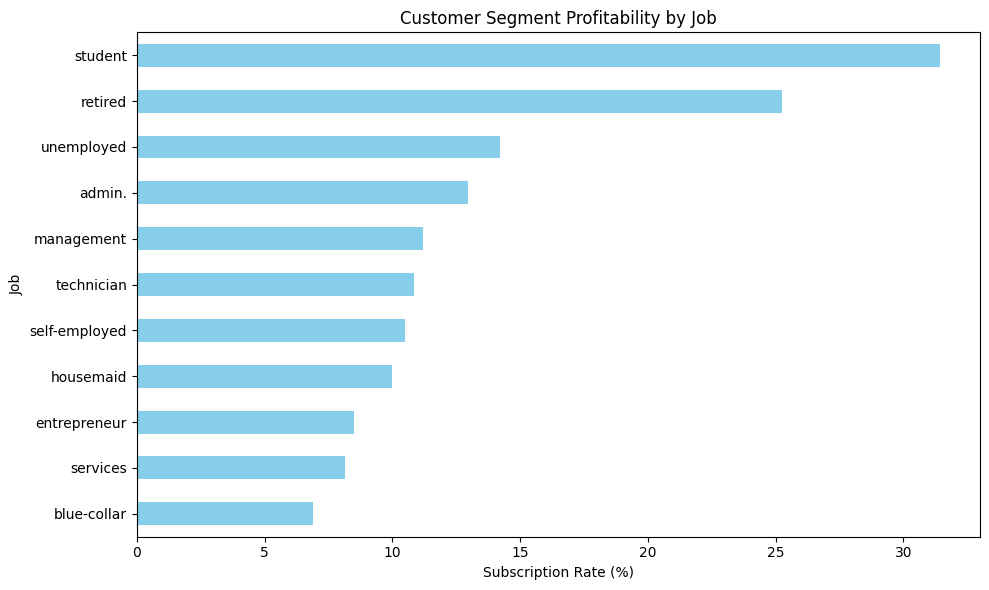

In [32]:
plt.figure(figsize=(10, 6))
profit_by_job = df.groupby('job')['y'].mean() * 100  
profit_by_job.sort_values().plot(kind='barh', color='skyblue')
plt.title('Customer Segment Profitability by Job')
plt.xlabel('Subscription Rate (%)')
plt.ylabel('Job')
plt.tight_layout()
plt.savefig('profitability_by_job.png')
plt.show()

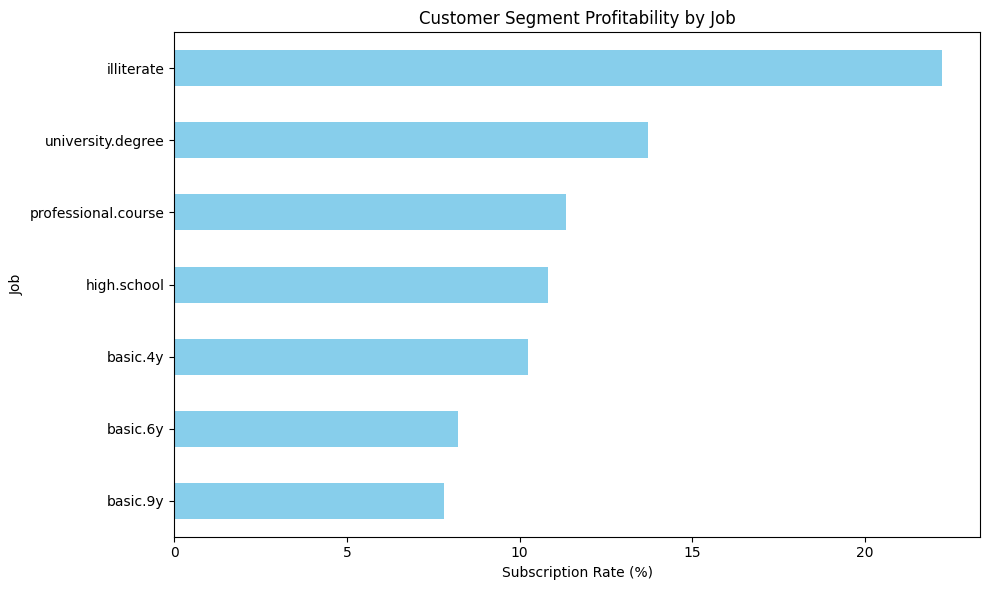

In [7]:
plt.figure(figsize=(10, 6))
profit_by_job = df.groupby('education')['y'].mean() * 100  
profit_by_job.sort_values().plot(kind='barh', color='skyblue')
plt.title('Customer Segment Profitability by Job')
plt.xlabel('Subscription Rate (%)')
plt.ylabel('Job')
plt.tight_layout()
plt.savefig('profitability_by_job.png')
plt.show()

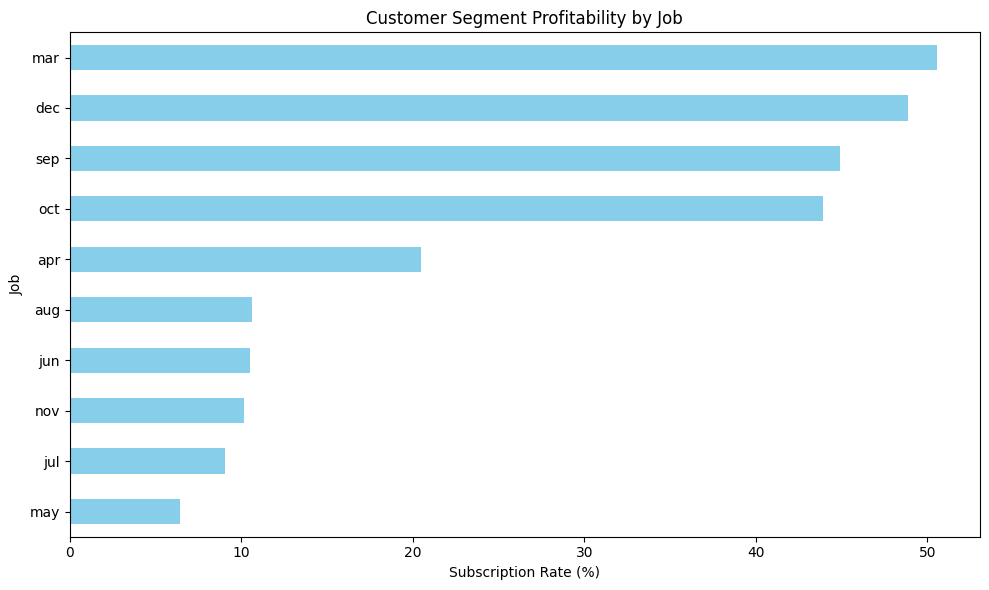

In [15]:
plt.figure(figsize=(10, 6))
profit_by_month = df.groupby('month')['y'].mean() * 100  
profit_by_month.sort_values().plot(kind='barh', color='skyblue')
plt.title('Customer Segment Profitability by Job')
plt.xlabel('Subscription Rate (%)')
plt.ylabel('Job')
plt.tight_layout()
plt.savefig('profitability_by_job.png')
plt.show()

In [30]:
profit_by_month

month
apr    20.486507
aug    10.605570
dec    48.901099
jul     9.038918
jun    10.511470
mar    50.549451
may     6.435680
nov    10.146341
oct    43.933054
sep    44.912281
Name: y, dtype: float64

In [ ]:
plt.figure(figsize=(10, 6))
profit_by_month = df.groupby('month')['y'].mean() * 100  
profit_by_month.sort_values().plot(kind='barh', color='skyblue')
plt.title('Customer Segment Profitability by Job')
plt.xlabel('Subscription Rate (%)')
plt.ylabel('Job')
plt.tight_layout()
plt.savefig('profitability_by_job.png')
plt.show()

In [11]:
df.head(10)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
1,57,services,married,high.school,<NA>,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
5,45,services,married,basic.9y,<NA>,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
6,59,admin.,married,professional.course,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
7,41,blue-collar,married,<NA>,<NA>,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
8,24,technician,single,professional.course,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
9,25,services,single,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0


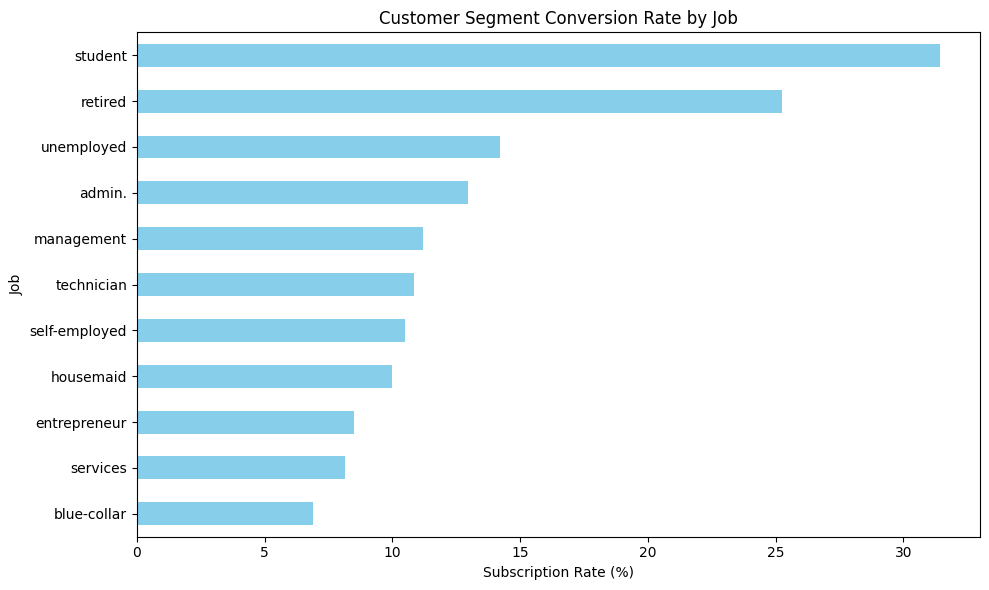

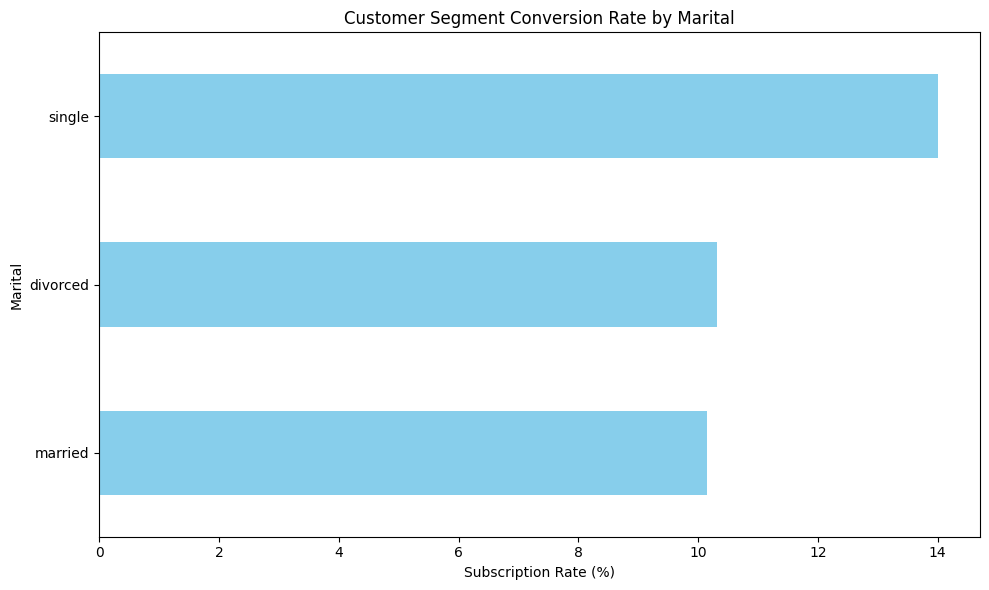

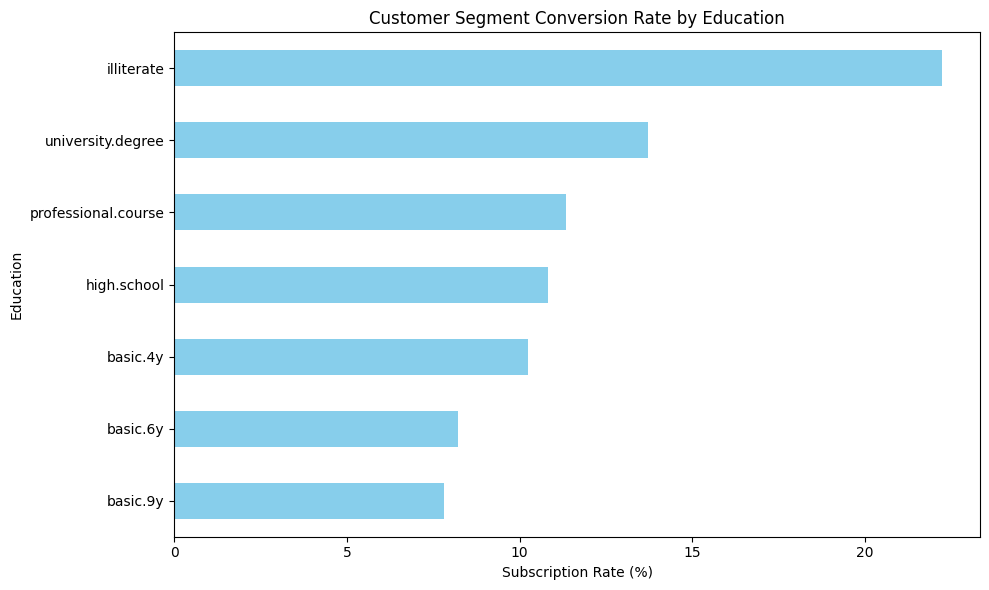

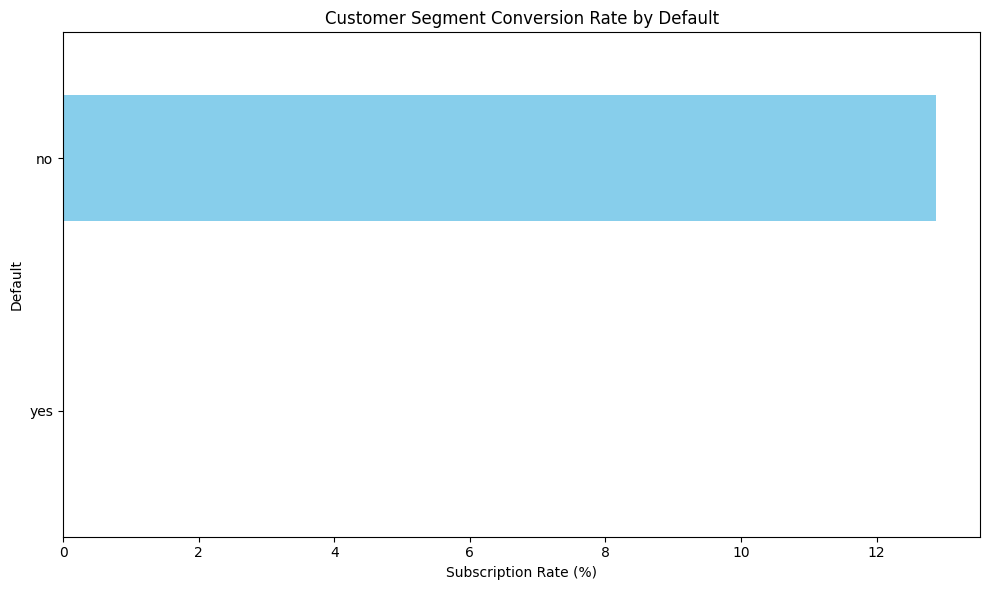

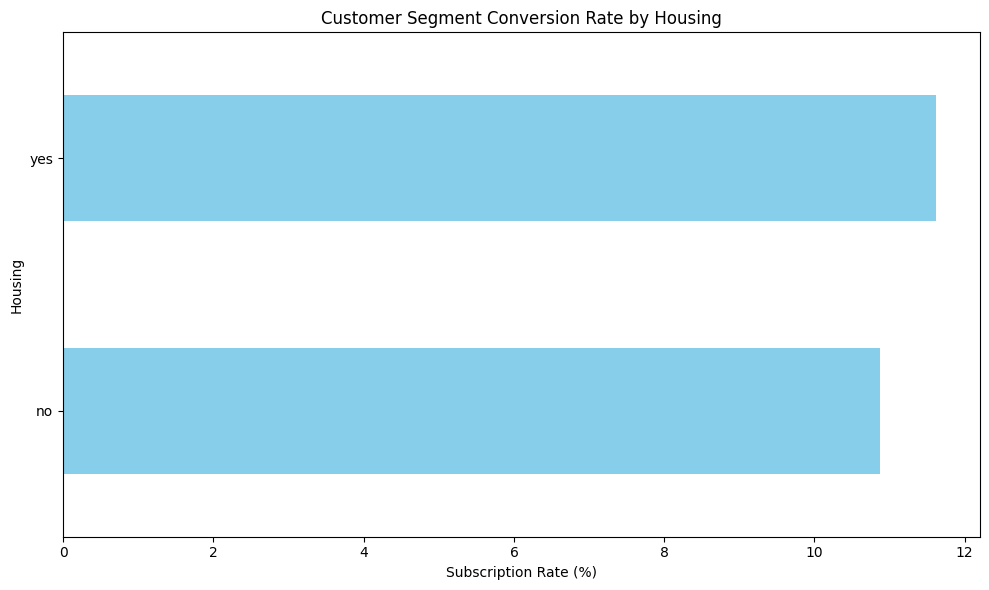

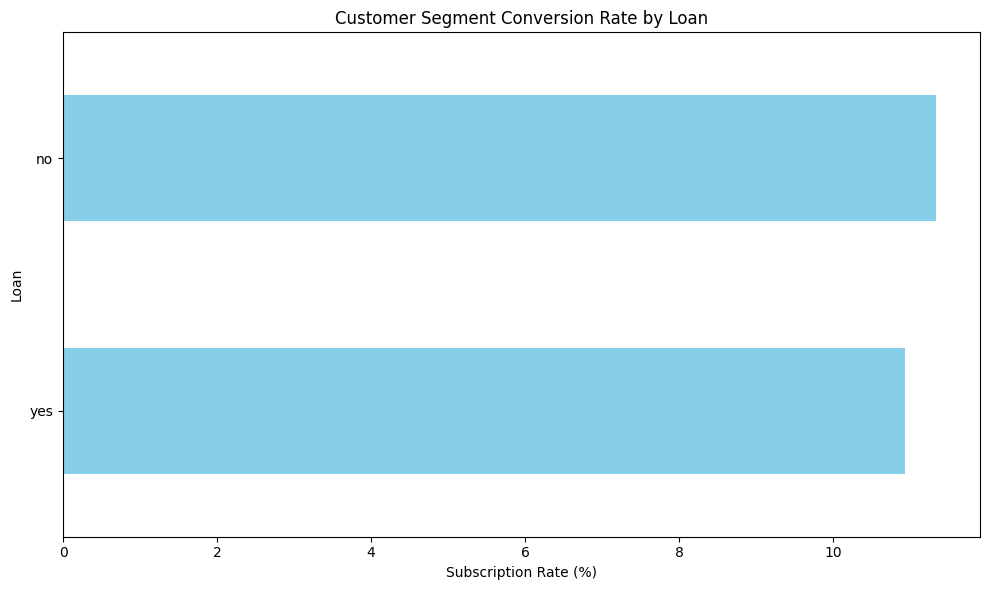

In [16]:
categorical_features = ['job', 'marital', 'education', 'default', 'housing', 'loan']

# Loop through each feature
for feature in categorical_features:
    plt.figure(figsize=(10, 6))
    
    # Calculate conversion rate (mean of y) by category
    conversion_rate = df.groupby(feature)['y'].mean() * 100
    
    # Sort values for better readability
    conversion_rate.sort_values().plot(kind='barh', color='skyblue')
    
    # Set titles and labels
    plt.title(f'Customer Segment Conversion Rate by {feature.capitalize()}')
    plt.xlabel('Subscription Rate (%)')
    plt.ylabel(feature.capitalize())
    
    # Save the figure
    filename = f'conversion_rate_by_{feature}.png'
    plt.tight_layout()
    plt.savefig(filename)
    plt.show()

In [ ]:
df.groupby(['converted_Fri','mkt_e'])['y'].count().unstack().plot(kind='bar', stacked=True)

NameError: name 'column' is not defined

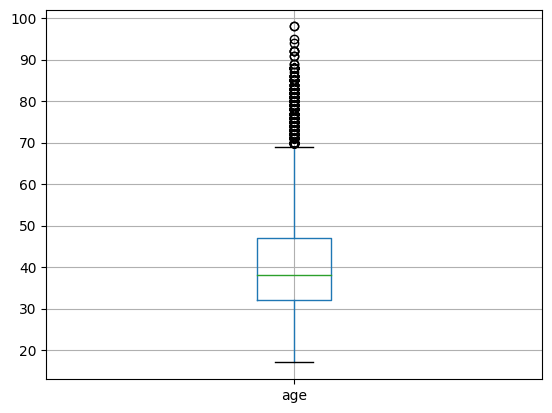

In [17]:
plt.figure()  # Create a new figure for each boxplot
df.boxplot(column='age')
plt.title(f"Boxplot of {column}")  # Set the title for each boxplot
plt.show()

In [18]:
# Define age bins and labels
age_bins = [15, 30, 40, 50, 60, 100]
age_labels = ['<30', '30–40', '40–50', '50–60', '60+']

# Create the age group column
df['age_group'] = pd.cut(df['age'], bins=age_bins, labels=age_labels, right=False)

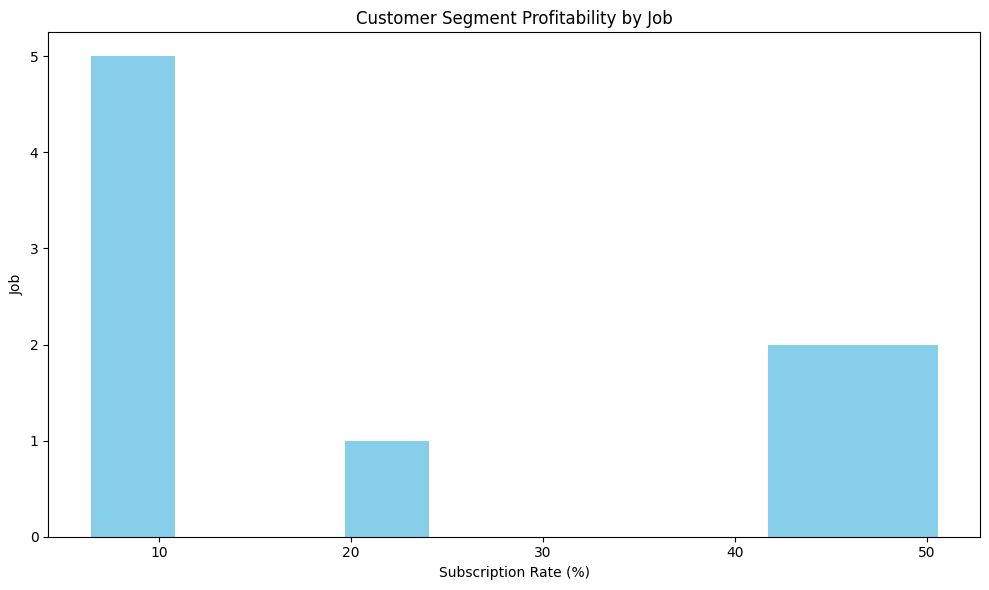

In [ ]:
plt.figure(figsize=(10, 6))
profit_by_month = df.groupby('month')['y'].mean() * 100  
profit_by_month.sort_values().plot(kind='hist', color='skyblue')
plt.title('Customer Segment Profitability by Job')
plt.xlabel('Subscription Rate (%)')
plt.ylabel('Job')
plt.tight_layout()
plt.savefig('profitability_by_job.png')
plt.show()

In [19]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y', 'age_group'],
      dtype='object')

In [ ]:
sns.histplot(data=df['positive_ratio'], kde=True)

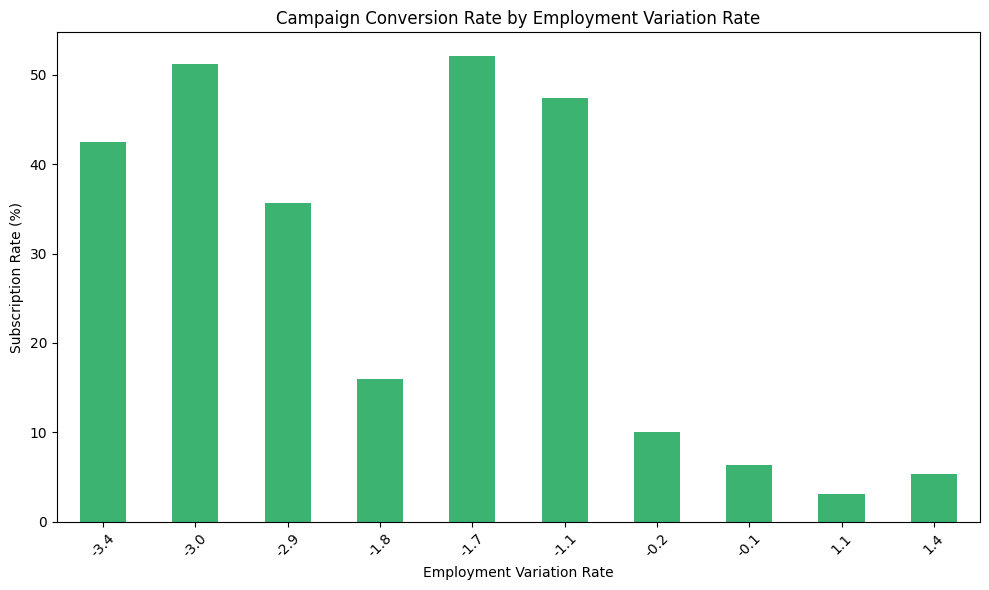

In [22]:
conversion_by_emp_rate = df.groupby('emp.var.rate')['y'].mean() * 100

plt.figure(figsize=(10, 6))
conversion_by_emp_rate.plot(kind='bar', color='mediumseagreen')
plt.title('Campaign Conversion Rate by Employment Variation Rate')
plt.xlabel('Employment Variation Rate')
plt.ylabel('Subscription Rate (%)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('conversion_by_emp_var_rate.png')
plt.show()


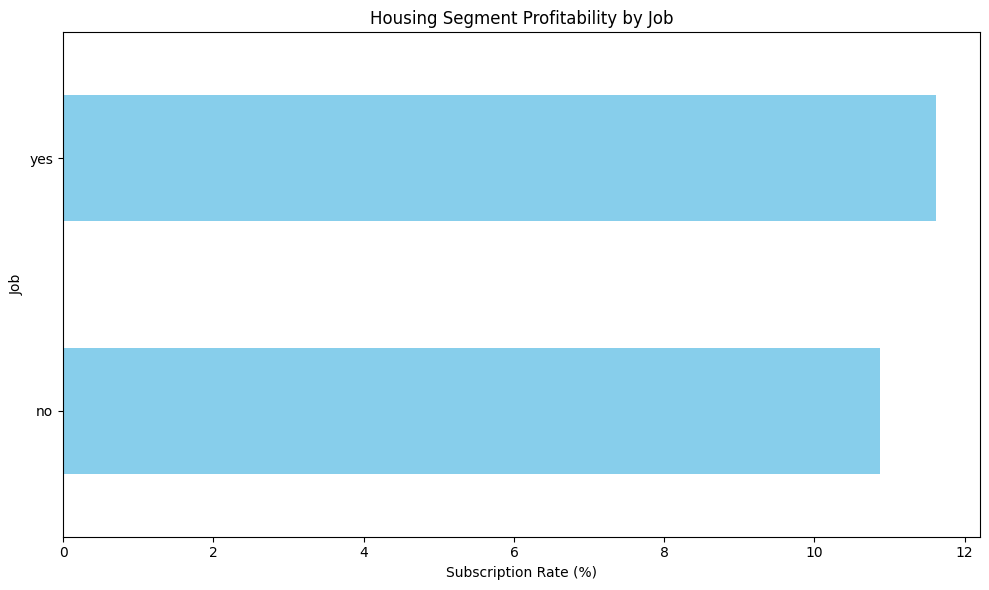

In [8]:
plt.figure(figsize=(10, 6))
profit_by_job = df.groupby('housing')['y'].mean() * 100  
profit_by_job.sort_values().plot(kind='barh', color='skyblue')
plt.title('Housing Segment Profitability by Job')
plt.xlabel('Subscription Rate (%)')
plt.ylabel('Job')
plt.tight_layout()
plt.savefig('profitability_by_job.png')
plt.show()

In [34]:
profit_by_education = df.groupby('education')['y'].mean() * 100

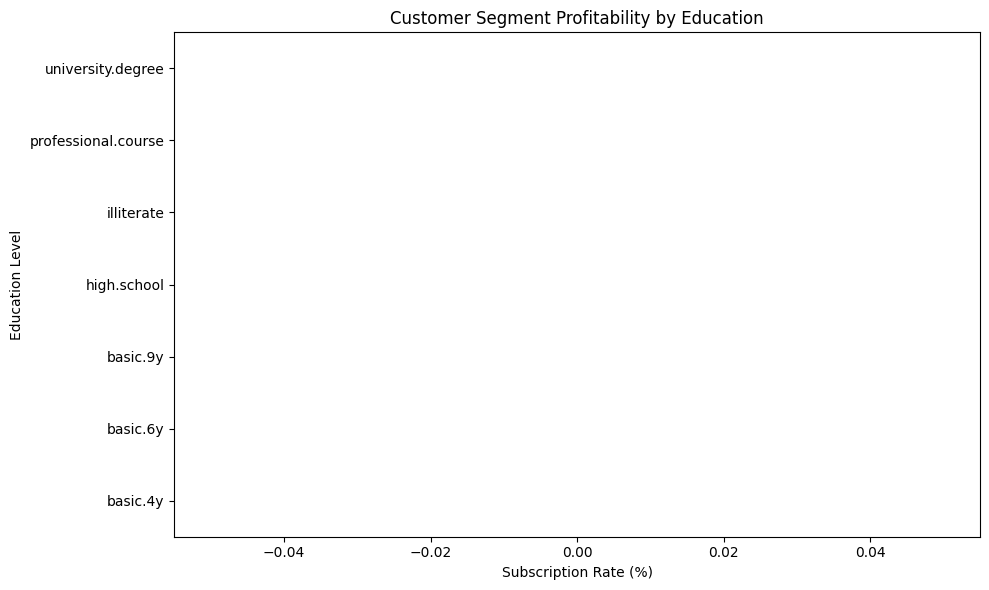

In [35]:
plt.figure(figsize=(10, 6))
profit_by_education.sort_values().plot(kind='barh', color='skyblue')
plt.title('Customer Segment Profitability by Education')
plt.xlabel('Subscription Rate (%)')
plt.ylabel('Education Level')
plt.tight_layout()
plt.savefig('profitability_by_education.png')
plt.show()

In [25]:
# mapping for cloumn y
df['default'] = df['default'].map({'yes': 1, 'no': 0})

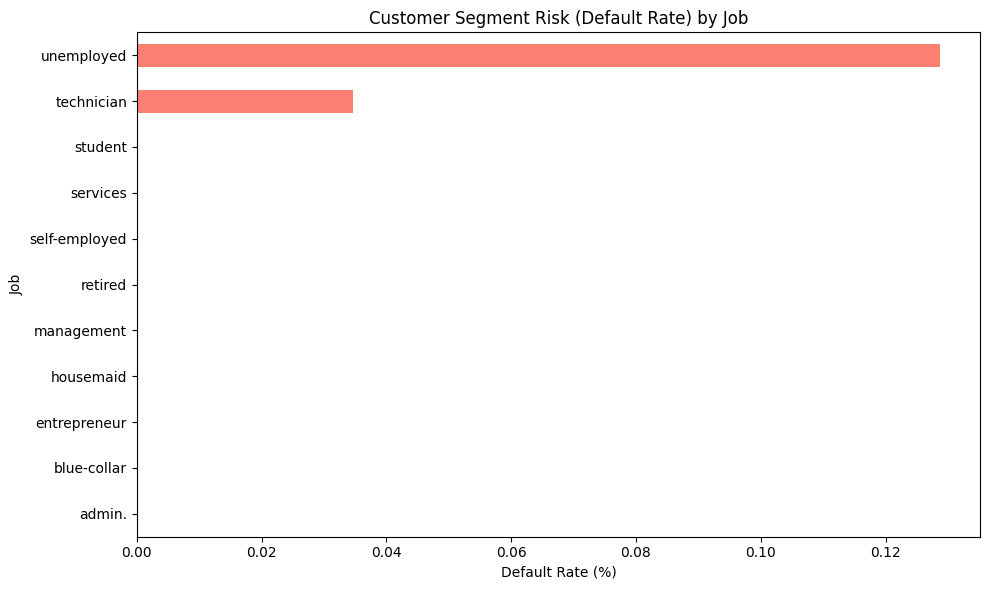

In [26]:
plt.figure(figsize=(10, 6))
risk_by_job = df.groupby('job')['default'].mean() * 100
risk_by_job.sort_values().plot(kind='barh', color='salmon')
plt.title('Customer Segment Risk (Default Rate) by Job')
plt.xlabel('Default Rate (%)')
plt.ylabel('Job')
plt.tight_layout()
plt.savefig('risk_by_job.png')
plt.show()

In [ ]:
plt.figure(figsize=(10, 6))
risk_by_job = df.groupby('job')['default'].mean() * 100
risk_by_job.sort_values().plot(kind='barh', color='salmon')
plt.title('Customer Segment Risk (Default Rate) by Job')
plt.xlabel('Default Rate (%)')
plt.ylabel('Job')
plt.tight_layout()
plt.savefig('risk_by_job.png')
plt.show()

In [13]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [43]:
df_month

,month,response_rate,total_count,month_num,percentage
5,mar,0.0,0,3,0.0
0,apr,0.0,0,4,0.0
6,may,0.0,0,5,0.0
4,jun,0.0,0,6,0.0
3,jul,0.0,0,7,0.0
1,aug,0.0,0,8,0.0
9,sep,0.0,0,9,0.0
8,oct,0.0,0,10,0.0
7,nov,0.0,0,11,0.0
2,dec,0.0,0,12,0.0


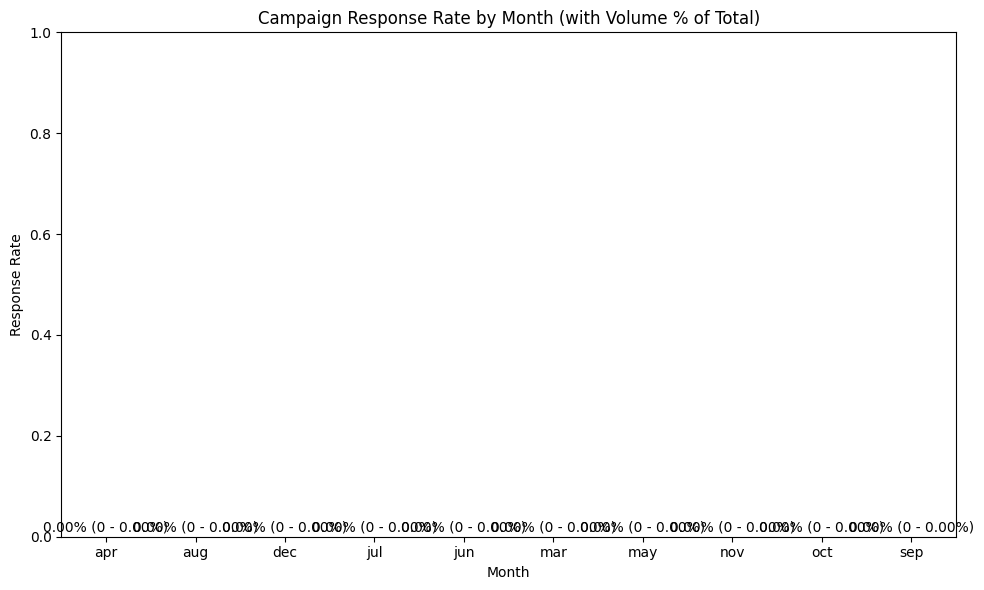

In [44]:
total_rows = len(df)
df = df.groupby('month')['y'].agg(response_rate=lambda x: (x == 'yes').mean(), total_count='count')
df['percentage'] = (df['total_count'] / total_rows * 100).round(2)
df = df.sort_index()

plt.figure(figsize=(10, 6))
sns.barplot(x=df.index, y='response_rate', data=df, palette='viridis')
for i, row in enumerate(df.itertuples()): plt.text(i, row.response_rate + 0.01, f'{row.response_rate:.2%} ({row.total_count} - {row.percentage:.2f}%)', ha='center')
plt.title('Campaign Response Rate by Month (with Volume % of Total)')
plt.xlabel('Month')
plt.ylabel('Response Rate')
plt.ylim(0, 1)
plt.tight_layout()
plt.show()

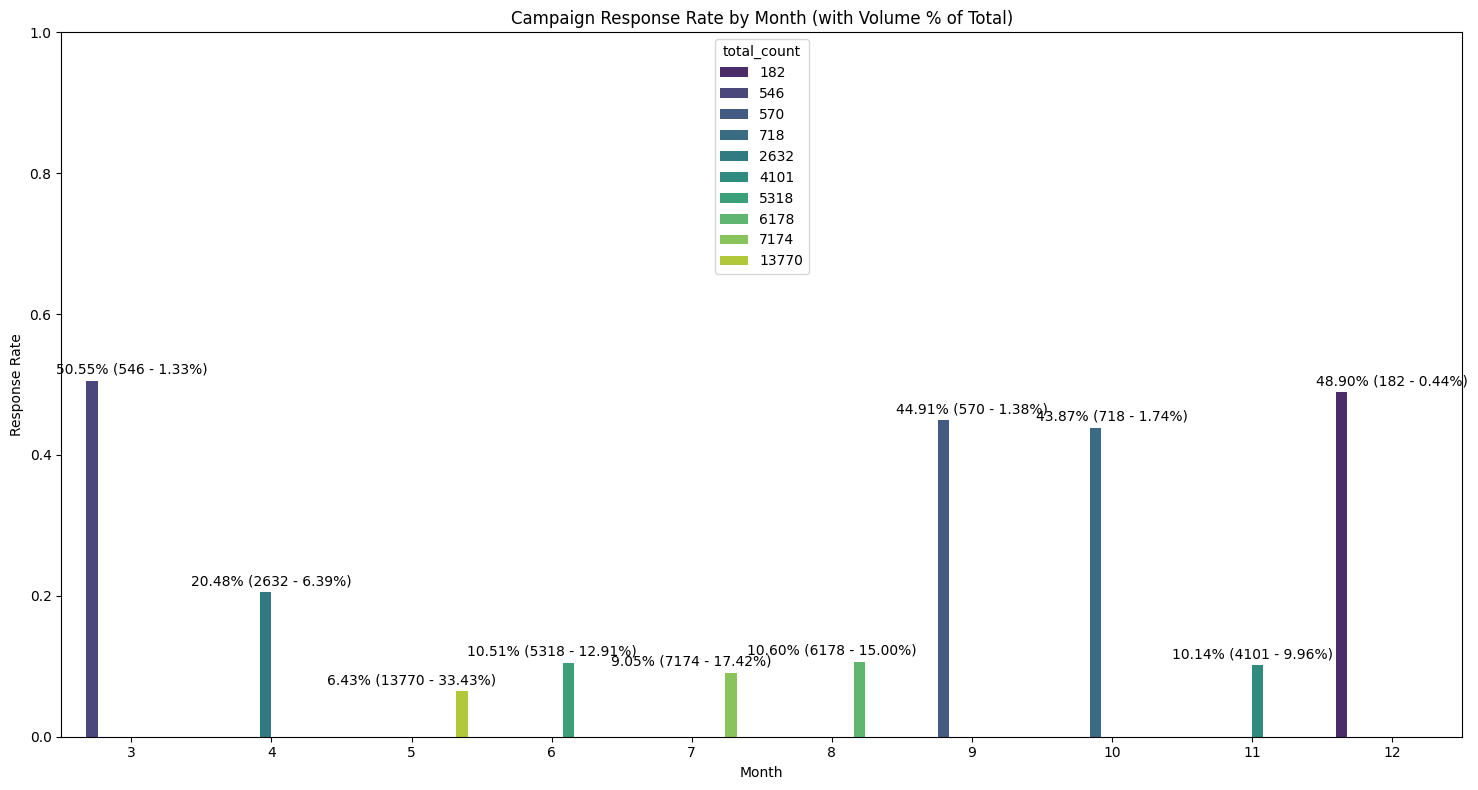

In [45]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


bank_data = pd.read_csv(r"C:\Users\oscar\Downloads\bankdata.csv", sep=';')
total_rows = len(bank_data)
mapping_months = { 'jan': 1, 'feb': 2, 'mar': 3, 'apr': 4, 'may': 5, 'jun': 6, 'jul': 7, 'aug': 8, 'sep': 9, 'oct': 10, 'nov': 11, 'dec': 12 }
bank_data['month'] = bank_data['month'].map(mapping_months)
df = bank_data.groupby('month')['y'].agg(response_rate=lambda x: (x == 'yes').mean(), total_count='count')
df['percentage'] = (df['total_count'] / total_rows * 100).round(2)
df = df.sort_index()

plt.figure(figsize=(15, 8))
sns.barplot(x=df.index, y='response_rate', data=df, palette='viridis', hue = 'total_count')
for i, row in enumerate(df.itertuples()): plt.text(i, row.response_rate + 0.01, f'{row.response_rate:.2%} ({row.total_count} - {row.percentage:.2f}%)', ha='center')
plt.title('Campaign Response Rate by Month (with Volume % of Total)')
plt.xlabel('Month')
plt.ylabel('Response Rate')
plt.ylim(0, 1)
plt.tight_layout()
plt.show()